_Lizenz: Das folgende Lehrmaterial kann unter einer [CC-BY-SA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz frei verwendet, verbreitet und modifiziert werden._   
 _Authoren: Jana Lasser (jana.lasser@ds.mpg.de)_  
 _Das Lehrmaterial wurde im Zuge des Projektes "Daten Lesen Lernen", gefördert vom Stifterverband und der Heinz Nixdorf Stiftung erstellt._

# Lösungen zu Übung 06 - Allgemein: Histogramme und Zeitreihen

<a name="top"></a>Inhalt
---
* [Histogramme](#histogramme)
* [Wie unterscheiden sich die User?](#user_unterschied)
* [Zeitreihen](#zeitreihen)

<a name="daten_beschaffen"></a>1. Histogramme
---
Zur Vorbereitung laden wir die gesäuberten Datensätze, die wir in Übung 05 abgespeichert haben:

In [3]:
# mit der Funktion "join()" können wir Pfade im Dateisystem sicher handhaben
from os.path import join

# die Bibliothek pandas liefert das DataFrame
import pandas as pd

tweets_normal = pd.read_csv(join('daten','tweets_normal.csv'), encoding='ISO-8859-1')
tweets_trump = pd.read_csv(join('daten','tweets_trump.csv'), encoding='ISO-8859-1')
tweets_troll = pd.read_csv(join('daten','tweets_troll.csv'), encoding='ISO-8859-1')

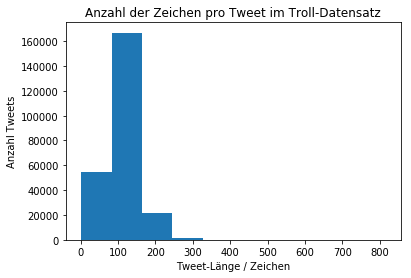

In [23]:
# 1.A
# importiere das Untermodul pyplot aus der Bibliothek
# matplotlib zum darstellen von Grafiken
import matplotlib.pyplot as plt
# mit diesem Kommando teilen wir dem Jupyter-Notebook mit,
# dass es Grafiken direkt im Notebook anzeigen soll
%matplotlib inline

# erstelle ein einfaches Histogram der Tweet-Länge der Troll-Accounts
plt.hist(tweets_troll['tweet_length'])

# Achsenbeschriftungen und Titel
plt.xlabel('Tweet-Länge / Zeichen')
plt.ylabel('Anzahl Tweets')
plt.title('Anzahl der Zeichen pro Tweet im Troll-Datensatz');

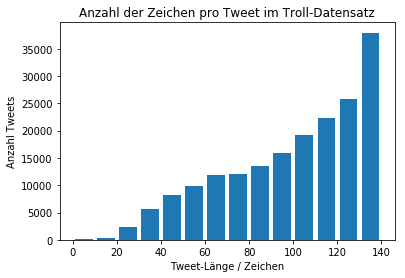

In [24]:
# 1.Ba
# die Werte liegen alle in einem Bereich von 0 bis 140 Zeichen.
# Indem wir die "range" entsprechend festlegen und die Anzahl der Bins
# auf 14 setzen, liegen die einzelnen Bins zwischen "glatten" Vielfachen
# von 10. Das ist anschaulich in einfach zu interpretieren. Diese 
# Darstellung lässt z.B. direkt ablesen, dass die meisten Tweets
# zwischen 130 und 140 Zeichen haben. Allerdings geht auch etwas 
# information verloren

# die rwidth auf einen Wert kleiner 1.0 zu setzen ist auch eine gute Idee,
# da es die einzelen bins in der Darstellung besser voneinander abgrenzt.

# Histogram
plt.hist(tweets_troll['tweet_length'], range=[0,140], bins=14, rwidth=0.8)

# Achsenbeschriftungen und Titel
plt.xlabel('Tweet-Länge / Zeichen')
plt.ylabel('Anzahl Tweets')
plt.title('Anzahl der Zeichen pro Tweet im Troll-Datensatz');

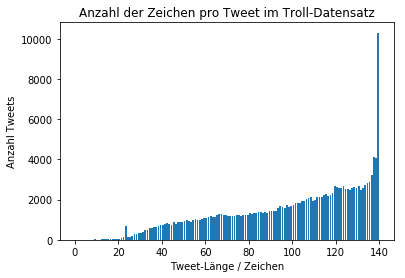

In [25]:
# 1.Bb
# stellen wir das Histogramm besser aufgelöst - nämlich mit einem
# bin je Zeichen - dar, dann wird deutlich, dass es eine extreme
# Häufung von Tweet-Längen bei 140 Zeichen gibt.

# Histogram
plt.hist(tweets_troll['tweet_length'], range=[0,140], bins=140, rwidth=0.8)

# Achsenbeschriftungen und Titel
plt.xlabel('Tweet-Länge / Zeichen')
plt.ylabel('Anzahl Tweets')
plt.title('Anzahl der Zeichen pro Tweet im Troll-Datensatz');

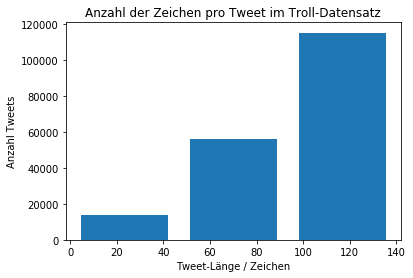

In [26]:
# 1.C wenige bins
# hier geht (wie schon oben beschrieben) viel Information verloren

# Histogram
plt.hist(tweets_troll['tweet_length'], range=[0,140], bins=3, rwidth=0.8)

# Achsenbeschriftungen und Titel
plt.xlabel('Tweet-Länge / Zeichen')
plt.ylabel('Anzahl Tweets')
plt.title('Anzahl der Zeichen pro Tweet im Troll-Datensatz');

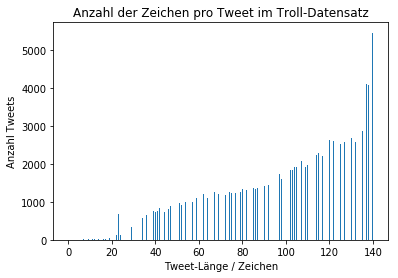

In [27]:
# 1.C viele bins
# hier geht der Vorteil der Aggregierten Information verloren. Insbesondere
# ergibt diese Darstellung wenig Sinn, da es nur ganzzahlige Tweetlängen
# geben kann. Entsprechend ist die maximal sinnvolle Anzahl von Bins bei
# einer maximalen Tweet-Länge von 140 Zeichen bins=140.

# Histogram
plt.hist(tweets_troll['tweet_length'], range=[0,140], bins=500, rwidth=0.8)

# Achsenbeschriftungen und Titel
plt.xlabel('Tweet-Länge / Zeichen')
plt.ylabel('Anzahl Tweets')
plt.title('Anzahl der Zeichen pro Tweet im Troll-Datensatz');

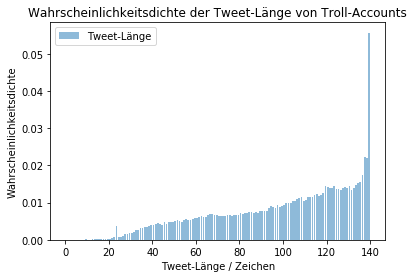

In [28]:
# 1.E (density)
# das Argument "density" verändert die Darstellung der Beobachtungen auf der y-Achse. 
# Vorher war die absolute Anzahl der Beobachtungen abgebildet, mit density=True
# wird die normierte Anzahl der beobachtungen abgebildet, die als Wahrscheinlichkeits-
# dichte interpretiert werden kann

# Histogramm
plt.hist(tweets_troll['tweet_length'], range=[0,140], bins=140, rwidth=0.8, \
         alpha=0.5, label='Tweet-Länge', density=True)

# Achsenbeschriftungen und Titel
plt.xlabel('Tweet-Länge / Zeichen')
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.title('Wahrscheinlichkeitsdichte der Tweet-Länge von Troll-Accounts');

# Legende
plt.legend();

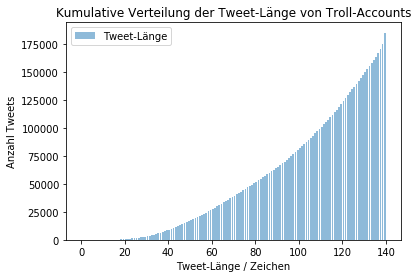

In [29]:
# 1.E (cumulative)
# wenn cumulative=True, dann zeigt jeder bin nicht nur die Anzahl der Beobachtungen
# in ebendiesem bin sondern die Anzahl in dem bin PLUS die Anzahl der Beobachtungen
# in allen Vorangegangenen bins. Die Anzahl der Beobachtungen im letzten Bin entspricht
# also immer der Gesamtanzahl der Beobachtungen.

# Histogramm 
plt.hist(tweets_troll['tweet_length'], range=[0,140], bins=140, rwidth=0.8, \
         alpha=0.5, label='Tweet-Länge', cumulative=True)

# Achsenbeschriftungen und Titel
plt.xlabel('Tweet-Länge / Zeichen')
plt.ylabel('Anzahl Tweets')
plt.title('Kumulative Verteilung der Tweet-Länge von Troll-Accounts');

# Legende
plt.legend();

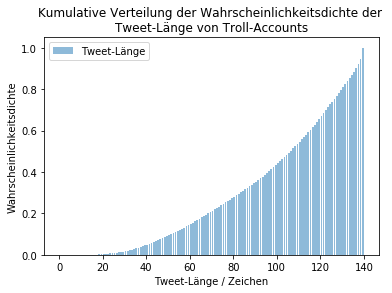

In [32]:
# 1.E (density & cumulative)
# ist sowohl density=True als auch cumulative=True, dann lässt sich schön beobachten,
# dass die Wahrscheinlichkeitsdichte auf 1 normiert ist, dass heißt die kumulierten 
# Wahrscheinlichkeiten, eine Beobachtung in einem Bin zu finden ist im letzten bin gleich 1

# Histogramm
plt.hist(tweets_troll['tweet_length'], range=[0,140], bins=140, rwidth=0.8, \
         alpha=0.5, label='Tweet-Länge', cumulative=True, density=True)

# Achsenbeschriftungen und Titel
plt.xlabel('Tweet-Länge / Zeichen')
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.title('Kumulative Verteilung der Wahrscheinlichkeitsdichte der \nTweet-Länge von Troll-Accounts');

# Legende
plt.legend();

[Anfang](#top)

<a name="user_unterschied"></a>2. Wie unterscheiden sich die User?
---
Zur Vorbereitung dieses Teils laden wir die bereinigten DataFrames, die wir in Übung 05 erstellt haben:

**A.** Visualisiere die Länge der Tweets von normalen Usern, Trollen und Trump in einem Histogram. Wähle ```bins``` und ```range``` so, dass die in den Daten steckende Information deutlich wird. Achte auf Achsenbeschriftungen, Titel und Legende der Abbildung.  <font color='green'>**HINWEIS:** Um die drei Datensätze vergleichbar zu machen, bietet sich das Argument ```density=True``` an.</font>  

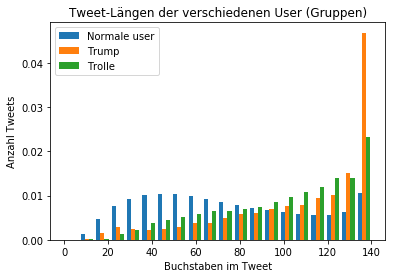

In [29]:
# um die Anzahl der Tweets mit einer bestimmten Länge vergleichbar zu
# machen benutzen wir hier das Argument "density=True". Damit werden
# die Anzahlen "normalisiert" (also durch die Gesamtanzahl der Tweets
# in einem Datensatz geteilt).
# Darüber hinaus können wir der Funktion plot() statt einer einzelnen
# Liste mit Werten auch eine Liste von Listen übergeben. Die Balken
# der verschiedenen Datensätze werden dann nebeneinander dargestellt.
# Das selbe gilt für das Argument "label", dem wir dann entsprechend 
# eine Liste mit Labels übergeben müssen.
plt.hist([tweets_normal['tweet_length'],\
          tweets_trump['tweet_length'],\
          tweets_troll['tweet_length']],bins=20,density=True,\
          label=['Normale user', 'Trump', 'Trolle'], rwidth=0.8, range=[0,140])

# Beschriftungen
plt.title('Tweet-Längen der verschiedenen User (Gruppen)')
plt.xlabel('Buchstaben im Tweet')
plt.ylabel('Anzahl Tweets')

plt.legend()

**B.** Was fällt dir an der Visualisierung auf? Verhalten sich die verschiedenen User (Gruppen) unterschiedlich? Was ist die mittlere Tweet-Länge für die normalen User, Trolle und Trump? Was der Median?

_Die drei User (Gruppen) verhalten sich Stark unterschiedlich:_
* _Donald Trump hat sehr viele Tweets mit exakt 140 Zeichen abgesetzt, was der maximal erlaubten Tweet-Länge entspricht. Das spricht dafür, dass er sich entweder sehr viele Gedanken um die optimale Tweet-Länge hat, oder aber einen professionellen Social Media Manager engagiert._
* _Die Tweet-Länge der normalen User hat ein Maximum bei etwa 45 Zeichen. Das könnte in etwa der Länge eines Satzes entsprechen (hier könnte man auch noch einmal eine genauere Analyse machen und nachsehen, wieviele Sätze ein Tweet enthält). Außerdem gibt es ein zweites Maximum bei 140 Zeichen, was dafür spricht, dass zumindest ein Teil der User einen Teil ihrer Tweets auf 140 Zeichen optimiert._
* _Die Tweetlänge der Trolle steigt linear an und hat ein etwas ausgeprägteres Maximum bei 140 Zeichen als die normalen User. Insgesamt unterscheidet sich die Verteilung der Tweet-Längen der Trolle doch sehr stark von der Verteilung der normalen User. Das könnte darauf hindeuten, dass die Tweets der Trolle von Algorithmen erzeugt werden._

In [26]:
for dataset, name in zip([tweets_normal, tweets_trump, tweets_troll],\
                         ['normale User', 'Trump', 'Trolle']):
    print('Die Mittlere Tweet-Länge für {} ist {:1.2f} Zeichen'\
          .format(name, dataset['tweet_length'].mean()))
    
    print('Der Median der Tweet-Länge für {} ist {:1.2f} Zeichen'\
          .format(name, dataset['tweet_length'].median()))
    
    print()

Die Mittlere Tweet-Länge für normale User ist 74.09 Zeichen
Der Median der Tweet-Länge für normale User ist 69.00 Zeichen

Die Mittlere Tweet-Länge für Trump ist 111.13 Zeichen
Der Median der Tweet-Länge für Trump ist 123.00 Zeichen

Die Mittlere Tweet-Länge für Trolle ist 115.31 Zeichen
Der Median der Tweet-Länge für Trolle ist 120.00 Zeichen



**C.** Visualisiere nur die Tweets der normalen User in einem Histogram. Wähle die maximale Anzahl an Zeichen, die in einem Tweet erlaubt sind als Anzahl der Bins und setze ```range=[0,140]```. Visualisiere Mittelwert und Median als Linien in der Abbildung.

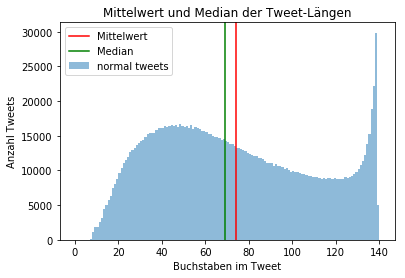

In [28]:
# Histogramm der Tweets der normalen User
plt.hist(tweets_normal['tweet_length'],bins=140,\
         label='normal tweets', rwidth=1, range=[0,140], alpha=0.5)

# berechne Mittelwert und Median
mittelwert = tweets_normal['tweet_length'].mean()
median = tweets_normal['tweet_length'].median()

# plotte zwei vertikale Linien, jeweils an Position x, die
# Mittelwert und Median darstellen
plt.axvline(x = mittelwert, color='red', label='Mittelwert')
plt.axvline(x = median, color='green', label='Median')

# Beschriftungen
plt.title('Mittelwert und Median der Tweet-Längen')
plt.xlabel('Buchstaben im Tweet')
plt.ylabel('Anzahl Tweets')
plt.legend()

[Anfang](#top)

<a name="zeitreihen"></a>3. Zeitreihen
---
Vorbereitung (aus der Übung 06):

In [75]:
# importiere das datetime objekt aus dem modul datetime
from datetime import datetime

# das ist das Format des Strings mit der Zeitinformation, also
# Jahr-Monat-Tag Stunde:Minute:Sekunde
fmt = '%Y-%m-%d %H:%M:%S'

# wir verwandeln die Einträge der Spalte 'Date' in datetime-Objekte
tweets_trump['Date_new'] = [datetime.strptime(date, fmt) for date in tweets_trump['Date']]

# berechnen der Zeitabstände
zeitabstand = [(date - tweets_trump['Date_new'].min()).total_seconds() for date in tweets_trump['Date_new']]

# Hinzufügen der Spalte
tweets_trump['timedelta'] = zeitabstand

# bei genauerem Nachdenken stellt sich die Darstellung in Sekunden als
# nicht so praktikabel heraus, deswegen teilen wir noch einmal durch
# 60 (Sekunden) mal 60 (Minuten), um den Zeitabstand in Stunden anzugeben
tweets_trump['timedelta'] = tweets_trump['timedelta'] / (60*60)

# das können wir so einfach tun, da die in der Spalte "Date" gespeicherten
# datetime-Objekte ein Attribut .year haben, das uns direkten Zugriff auf das
# Jahr gibt (ähnlich übrigens mit Monat und Tag).
tweets_trump['year'] = [date.year for date in tweets_trump['Date_new']]

# Sortieren Tabelle anhand der Spalte "timedelta"
tweets_trump.sort_values('timedelta',inplace=True)

tweets_trump.head()

,Unnamed: 0,Date,User,Tweet,tweet_length,word_number,Date_new,timedelta,year,time_gap
18,18,2009-05-04 18:54:00,realDonaldTrump,Be sure to tune in and watch Donald Trump on L...,117.0,23.0,2009-05-04 18:54:00,0.000000,2009,0.000000
48,48,2009-05-05 01:00:00,realDonaldTrump,Donald Trump will be appearing on The View tom...,131.0,22.0,2009-05-05 01:00:00,6.100000,2009,13385.383333
56,56,2009-05-08 13:38:00,realDonaldTrump,Donald Trump reads Top Ten Financial Tips on L...,116.0,17.0,2009-05-08 13:38:00,90.733333,2009,-764.983333
80,80,2009-05-08 20:40:00,realDonaldTrump,New Blog Post: Celebrity Apprentice Finale and...,103.0,13.0,2009-05-08 20:40:00,97.766667,2009,646.450000
78,78,2009-05-12 14:07:00,realDonaldTrump,"""My persona will never be that of a wallflower...",111.0,21.0,2009-05-12 14:07:00,187.216667,2009,-8948.233333


In [76]:
# nach dem Sortieren ist der Index (linkeste Spalte)
# nicht mehr aufsteigend sondern wild durcheinander gefürfelt.
# Da wir später über den Index iterieren wollen, setzen wir
# den Index wieder so, dass er in einer-Schritten aufsteigt:
tweets_trump.reset_index(inplace=True)
tweets_trump.head()

,index,Unnamed: 0,Date,User,Tweet,tweet_length,word_number,Date_new,timedelta,year,time_gap
0,18,18,2009-05-04 18:54:00,realDonaldTrump,Be sure to tune in and watch Donald Trump on L...,117.0,23.0,2009-05-04 18:54:00,0.000000,2009,0.000000
1,48,48,2009-05-05 01:00:00,realDonaldTrump,Donald Trump will be appearing on The View tom...,131.0,22.0,2009-05-05 01:00:00,6.100000,2009,13385.383333
2,56,56,2009-05-08 13:38:00,realDonaldTrump,Donald Trump reads Top Ten Financial Tips on L...,116.0,17.0,2009-05-08 13:38:00,90.733333,2009,-764.983333
3,80,80,2009-05-08 20:40:00,realDonaldTrump,New Blog Post: Celebrity Apprentice Finale and...,103.0,13.0,2009-05-08 20:40:00,97.766667,2009,646.450000
4,78,78,2009-05-12 14:07:00,realDonaldTrump,"""My persona will never be that of a wallflower...",111.0,21.0,2009-05-12 14:07:00,187.216667,2009,-8948.233333


### Aufgaben
**A.** Was ist das Datum und die Uhrzeit des frühesten und spätesten Tweets im Datensatz?  

In [77]:
print('Ältester Tweet: {}'.format(tweets_trump['Date_new'].min()))
print('Jüngster Tweet: {}'.format(tweets_trump['Date_new'].max()))

Ältester Tweet: 2009-05-04 18:54:00
Jüngster Tweet: 2018-01-12 13:48:00


**B.** Erstelle ein Liniendiagramm der Tweet-Länge über der Zeit. Vergiss dabei nicht die Achsenbeschriftungen etc. Wie entwickelt sich die Tweet-Länge in der Zeit bevor Trump seine Kandidatur bekannt gibt? Wie danach? Wie kannst du dir die plötzlichen Sprünge in der Tweet-Länge erklären?  

Text(0,0.5,'tweet length / characters')

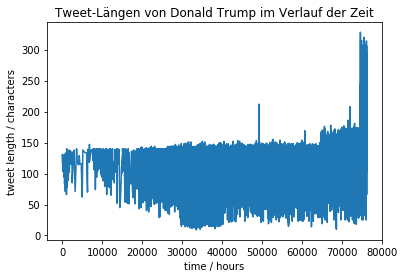

In [78]:
# in der Spalte 'timedelta' ist die Zeit (in Stunden) seit dem
# erstem Tweet angegeben. Plotte die Tweet-Länge über der Zeit:
plt.plot(tweets_trump['timedelta'], tweets_trump['tweet_length'])

# Beschriftungen
plt.title('Tweet-Längen von Donald Trump im Verlauf der Zeit')
plt.xlabel('time / hours')
plt.ylabel('tweet length / characters')

**C.** Mit den Funktionen ```plt.xlim(xmin, xmax)``` kannst du den Bereich auf der x-Achse einschränken, der im Diagramm angezeigt wird. Benutze diese Funktion, um dir kleinere Zeiträume genauer anzusehen. 

Text(0,0.5,'tweet length / characters')

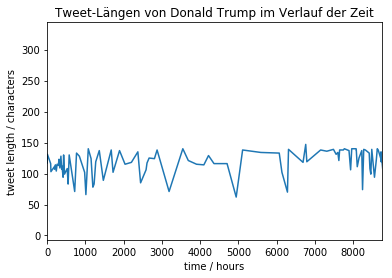

In [79]:
# Tweets im ersten Jahr
plt.plot(tweets_trump['timedelta'], tweets_trump['tweet_length'])

year = 24*365 # ein Tag hat 24 Stunden, ein Jahr 365 Tage
plt.xlim(0, year)

# Beschriftungen
plt.title('Tweet-Längen von Donald Trump im Verlauf der Zeit')
plt.xlabel('time / hours')
plt.ylabel('tweet length / characters')

Text(0,0.5,'tweet length / characters')

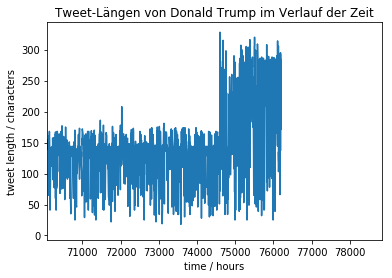

In [80]:
# Tweets im letzten Jahr
plt.plot(tweets_trump['timedelta'], tweets_trump['tweet_length'])

year = 24*365 # ein Tag hat 24 Stunden, ein Jahr 365 Tage
plt.xlim(8 * year, 9 * year)

# Beschriftungen
plt.title('Tweet-Längen von Donald Trump im Verlauf der Zeit')
plt.xlabel('time / hours')
plt.ylabel('tweet length / characters')

Text(0,0.5,'tweet length / characters')

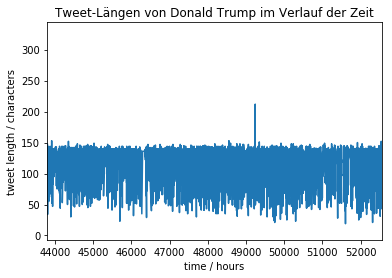

In [81]:
# Tweets im sechsten Jahr
plt.plot(tweets_trump['timedelta'], tweets_trump['tweet_length'])

year = 24*365 # ein Tag hat 24 Stunden, ein Jahr 365 Tage
plt.xlim(5 * year, 6 * year)

# Beschriftungen
plt.title('Tweet-Längen von Donald Trump im Verlauf der Zeit')
plt.xlabel('time / hours')
plt.ylabel('tweet length / characters')

**D.** Berechne für die einzelnen Jahre die Mittlere Tweet-Länge und die mittlere Anzahl der Worte pro Tweet. Visualisiere alle Größen über den Verlauf der Jahre. Was siehst du und wie lässt sich die Abbildung interpretieren?  

In [104]:
# der betrachtete Zeitraum
zeitraum = list(range(2009, 2018))

# leere Listen, die wir gleich füllen werden
mean_tweet_length = []
mean_word_number = []

# iteriere über den Zeitraum
for year in zeitraum:
    maske_year = tweets_trump['year'] == year
    tweets_trump_year = tweets_trump[maske_year]
    mean_tweet_length.append(tweets_trump_year['tweet_length'].mean())
    mean_word_number.append(tweets_trump_year['word_number'].mean())

Text(0.5,0,'Jahr')

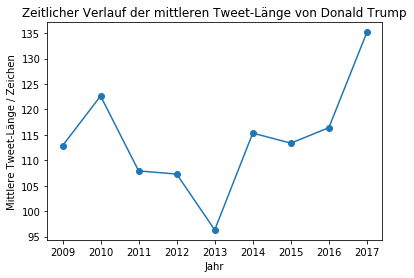

In [105]:
# Visualisierung des zeitlichen Verlaufs der mittleren Tweet-Länge
plt.plot(zeitraum, mean_tweet_length, '-o', label='Tweets von Donald Trump')

# Beschriftungen
plt.title('Zeitlicher Verlauf der mittleren Tweet-Länge von Donald Trump')
plt.ylabel('Mittlere Tweet-Länge / Zeichen')
plt.xlabel('Jahr')

Text(0.5,0,'Jahr')

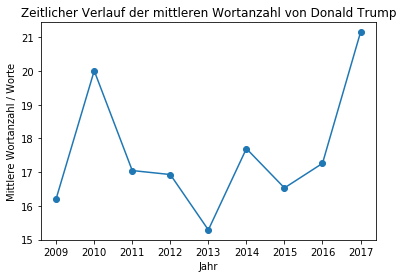

In [106]:
# Visualisierung des zeitlichen Verlaufs der mittleren Wortanzahl
plt.plot(zeitraum, mean_word_number, '-o', label='Tweets von Donald Trump')

# Beschriftungen
plt.title('Zeitlicher Verlauf der mittleren Wortanzahl von Donald Trump')
plt.ylabel('Mittlere Wortanzahl / Worte')
plt.xlabel('Jahr')

* _Die mittlere Tweet-Länge und die mittlere Anzahl der Worte verlaufen beide fast gleich: es gibt ein ausgeprägtes Minimum im Jahr 2013, im Jahr 2017 erreicht die mittlere Tweet-Länge ein Maximum von 135 bzw. die mittlere Wortanzahl ein Maximum von 21 Worten je Tweet._

**F.** Auch die Funktion ```plot()``` hat viele verschiedene Argumente, mit denen man ihr Verhalten modifizieren kann. Mache dich mit der Dokumentation der Funktion vertraut und probiere ein paar Argumente aus, um die Abbildung zu verändern. Versuche insbesondere, die Darstellung der Linie zu verändern: aktuell ist die Linie einfach nur eine Linie. Möglich sind aber auch Punkte oder Striche. Was eignet sich für unsere Daten am besten und warum?  


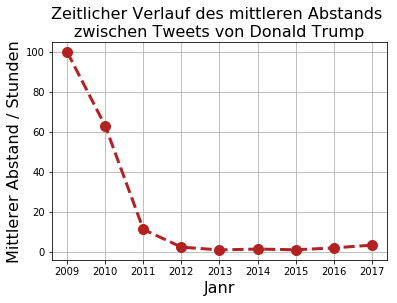

In [103]:
# Dokumentation der Funktion plot(): 
# https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html

# die Farbe können wir mit "color" anpassen. Als Argument übergeben
# wir entweder eine der vielen bekannten Farbname wie "red" oder "green"
# oder aber RGB-Werte
# mit "linewidth" passen wir die Dicke der Linie an
# mit "markersize" die Größe der Punkte
# der String "--o" gibt das Format der Line an: in diesem Fall
# eine gestrichelte Line mit Punkten wo Daten vorliegen
plt.plot(zeitraum, mean_time_gap, '--o', color='FireBrick',\
         linewidth=3, markersize=10, label='Tweets von Donald Trump')

# hiermit schalten wir ein Gitter im Hintergrund des Plots zu
plt.grid()

# Beschriftungen, diesmal mit größerer Schriftgröße
plt.title('Zeitlicher Verlauf des mittleren Abstands \nzwischen Tweets von Donald Trump',fontsize=16)
plt.ylabel('Mittlerer Abstand / Stunden', fontsize=16)
plt.xlabel('Janr',fontsize=16);

**G. (optional)** Rechne den zeitlichen Abstand zwischen den aufeinander folgenden Tweets aus und füge ihn als eine neuen Spalte zum DataFrame hinzu. Wieviele Tweets pro Stunde hat Trump über den gesamten betrachteten Zeitraum in etwa abgesetzt? Was ist der Median des Zeitabstandes? Wie interpretierst du die Diskrepanz zwischen Mittelwert und Median?  

In [107]:
# Wir machen uns zunutze, dass die Tweets a) schon sortiert nach Zeitpunkten 
# vorliegen und b) wir mit den Datetime-Objekten sehr einfach rechnen 
# (sie voneinander abziehen) können.

# Liste, in der wir die Zeiträume speichern werden. An erster Stelle der Liste 
# steht eine Null, da der zeitliche Abstand des ersten Tweets zum vorangegangenen
# Tweet nicht definiert ist
gaps = [0]

# iteriere über alle Tweets (minus dem ersten)
for index in range(1,len(tweets_trump)):
    # berechne den Zeitlichen Abstand zwischen einem Tweet mit
    # Index i und dem vorangegangenen Tweet mit Index i - 1
    gap = tweets_trump.loc[index]['timedelta'] - tweets_trump.loc[index - 1]['timedelta']
    # füge den errechneten Zeitabstand der Liste hinzu
    gaps.append(gap)
    
# füge die Liste dem DataFrame hinzu
tweets_trump['time_gap'] = gaps

In [112]:
mean_abstand = tweets_trump['time_gap'].mean()
median_abstand = tweets_trump['time_gap'].median()

print('Der mittlere Abstand zwischen zwei Tweets ist {:1.2f} Stunden'\
      .format(mean_abstand))
print('Trump hat über den gesamten Zeitraum {:1.2f} Tweets pro Stunde abgesetzt.'\
      .format(1 / mean_abstand))
print('Der Median des zeitlichen Abstands zwischen zwei Tweets ist {:1.2f} Stunden.'\
      .format(median_abstand))

Der mittlere Abstand zwischen zwei Tweets ist 2.32 Stunden
Trump hat über den gesamten Zeitraum 0.43 Tweets pro Stunde abgesetzt.
Der Median des zeitlichen Abstands zwischen zwei Tweets ist 0.18 Stunden.


* _In den frühen Jahren liegen oft sehr große Zeitabstände zwischen den Tweets, die den Mittelwert nach oben ziehen. Später hat der Account Trumps sehr viele Tweets in sehr kurzem Abstand abgesetzt, was den vergleichsweise niedrigeren Median von 0.18 Stunden bzw. etwa 11 Minuten erklärt._

**H. (optional)** Errechne den Mittelwert und Median des Zeitabstands zwischen den Tweets für jedes einzelne Jahr im Datensatz. Visualisiere den zeitlichen Verlauf des Mittelwerts und Medians über die Jahre in einem Liniendiagramm. Vergiss nicht auf Achsenbeschriftungen etc.  

In [114]:
# der betrachtete Zeitraum
zeitraum = list(range(2009, 2018))

# leere Listen, die wir gleich füllen werden
mean_time_gap = []
median_time_gap = []

# iteriere über den Zeitraum
for year in zeitraum:
    maske_year = tweets_trump['year'] == year
    tweets_trump_year = tweets_trump[maske_year]
    mean_time_gap.append(tweets_trump_year['time_gap'].mean())
    median_time_gap.append(tweets_trump_year['time_gap'].median())

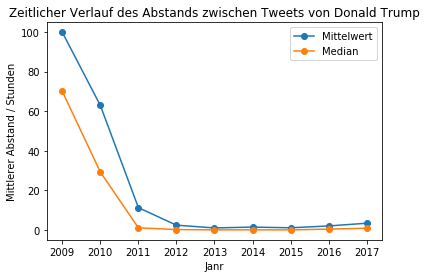

In [117]:
# Visualisierung des zeitlichen Verlaufs des mittleren Abstandes zwischen zwei Tweets
plt.plot(zeitraum, mean_time_gap, '-o', label='Mittelwert')
plt.plot(zeitraum, median_time_gap, '-o', label='Median')

# Beschriftungen
plt.title('Zeitlicher Verlauf des Abstands zwischen Tweets von Donald Trump')
plt.ylabel('Mittlerer Abstand / Stunden')
plt.xlabel('Janr')
plt.legend()

* _Der mittlere zeitliche Abstand zwischen Tweets sinkt von etwa 100 STunden im Jahr 2009 auf etwa eine Stunde im Jahr 2012 und bleibt dann relativ konstant auf diesem Wert. Anscheinend hat Trump in der Zeit zwischen 2009 und 2012 Twitter kennen und lieben gelernt (oder einen Social Media Manager eingestellt...). Der Median folgt dem selben Trend und fällt für die späteren Jahre praktisch genau mit dem Mittelwert zusammen._

**I. (optional)** Visualisiere die Zeitabstände in einem Histogram. Zeichne eine Linie bei 7 Stunden ein (wir nehmen einmal an, das ist in etwa die Zeit, die ein Mensch schläft). Kannst du aus der Visualisierung entnehmen, ob Donald Trump schläft?

Text(0.5,1,'Zeitlicher Abstand zwischen Tweets')

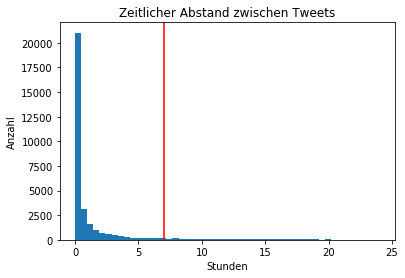

In [122]:
# Visualisierung: wir visualisieren nur den Bereich zwischen 
# 0 und 24 Stunden, um einen besseren Überblick über die 
# kleineren Zeitabstände zu bekommen
plt.hist(tweets_trump['time_gap'].dropna(),range=[0,24],bins=50)
# zeichne eine Linie ein
plt.axvline(x=7, color='red')
# Beschriftungen
plt.xlabel('Stunden')
plt.ylabel('Anzahl')
plt.title('Zeitlicher Abstand zwischen Tweets')

Text(0.5,1,'Zeitlicher Abstand zwischen Tweets')

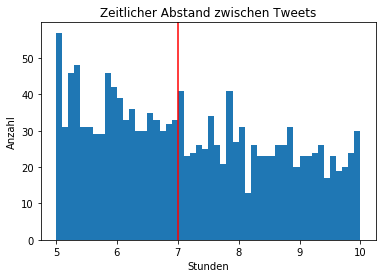

In [124]:
# Zoom in den Bereich 5-10 Stunden, um die Verteilung dort noch
# genauer anzusehen
plt.hist(tweets_trump['time_gap'].dropna(),range=[5,10],bins=50)
# zeichne eine Linie ein
plt.axvline(x=7, color='red')
# Beschriftungen
plt.xlabel('Stunden')
plt.ylabel('Anzahl')
plt.title('Zeitlicher Abstand zwischen Tweets')

In [131]:
# wieviele Zeitabstände liegen zwischen 5 und 10 Stunden?
len(tweets_trump[(tweets_trump['time_gap'] > 5) & (tweets_trump['time_gap'] < 10)])

1463

* _Es gibt kein Anzeichen für eine Häufung der Abstände um die 7 Stunden Marke. Da der Datensatz 8 Jahre und damit 8*365 = 2920 Nächte enthält, würden wir zumindest einige tausend "durchgeschlafene" Nächte erwarten. Der Datensatz enthält mit 1463 aber nur etwa halb so viele Zeitabstände zwischen 5 und 10 Stunden. Das deutet darauf hin, dass entweder mehr als eine Person Trumps Account betreut, oder aber er häufig nicht durchschläft und twittert._ 

[Anfang](#top)